In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
tf = pd.read_csv('C:/Users/Sambhu/Desktop/Imarticus/Class Material/Machine Learning/Random Forest/TaxiFare.csv')

In [3]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
tf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
tf.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# Amount

Text(0.5, 1.0, 'Histogram of Taxi Fare amount')

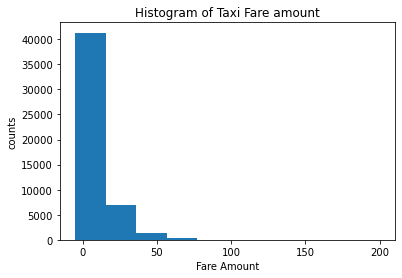

In [6]:
plt.hist(tf.amount, bins=10)
plt.xlabel("Fare Amount")
plt.ylabel('counts')
plt.title("Histogram of Taxi Fare amount")

<AxesSubplot:>

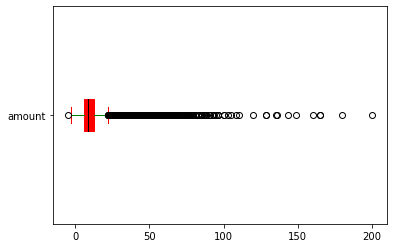

In [7]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.amount.plot.box(color=props2, patch_artist = True, vert = False)

In [8]:
from scipy import stats 
iqr = stats.iqr(tf.amount)

In [9]:
low_lim = tf.amount.quantile(0.25)-1.5*iqr

In [10]:
len(tf.amount[tf.amount < low_lim])

1

In [11]:
up_lim = tf.amount.quantile(0.75)+1.5*iqr

In [12]:
len(tf.amount[tf.amount > up_lim])

4364

In [13]:
tf.amount.value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
26.60       1
25.39       1
55.83       1
30.04       1
27.05       1
Name: amount, Length: 703, dtype: int64

In [14]:
len(tf.amount[tf.amount <0]) 

6

In [15]:
len(tf.amount[tf.amount >150])

5

In [16]:
len(tf.amount[tf.amount >100]) 

16

In [17]:
len(tf.amount[tf.amount >50])

636

# Date Time of Pick-up

In [18]:
tf.date_time_of_pickup = pd.to_datetime(tf.date_time_of_pickup)

In [19]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [20]:
tf['year'] = tf["date_time_of_pickup"].dt.year

In [21]:
tf['month'] = tf["date_time_of_pickup"].dt.month_name()

In [22]:
tf['day'] = tf["date_time_of_pickup"].dt.day_name()

In [23]:
tf['hour'] = tf["date_time_of_pickup"].dt.hour

Text(0.5, 1.0, 'Yearwise counting')

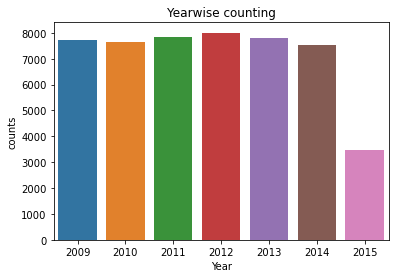

In [24]:
sns.countplot(x='year', data=tf)
plt.xlabel("Year")
plt.ylabel('counts')
plt.title("Yearwise counting")

In [25]:
tf.year.value_counts()

2012    8005
2011    7832
2013    7819
2009    7716
2010    7646
2014    7530
2015    3452
Name: year, dtype: int64

<AxesSubplot:>

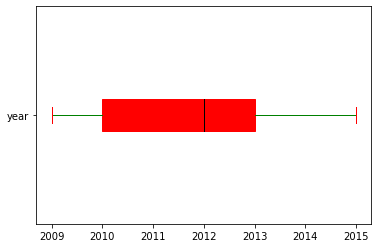

In [26]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.year.plot.box(color=props2, patch_artist = True, vert = False)

In [27]:
tf.groupby('year')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2009,7716.0,10.049168,8.447096,2.5,5.7,7.7,11.3,165.00
2010,7646.0,10.137180,8.406004,-2.9,5.7,7.7,11.3,143.00
2011,7832.0,10.465931,8.467032,2.5,5.7,7.7,11.7,96.00
2012,8005.0,11.228863,9.667937,2.5,6.0,8.5,12.5,200.00
2013,7819.0,12.439474,10.428842,-3.0,6.5,9.5,14.0,180.00
2014,7530.0,13.139649,11.311478,2.5,6.5,9.5,15.0,165.00
2015,3452.0,13.064392,10.799374,-5.0,6.5,9.5,15.0,96.25


<AxesSubplot:xlabel='year', ylabel='amount'>

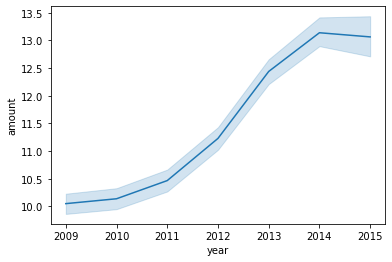

In [28]:
sns.lineplot(y='amount', x='year', data=tf)

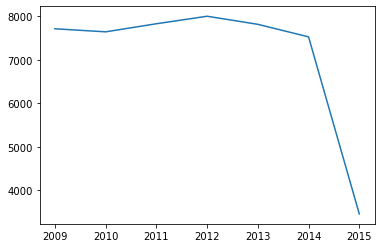

In [29]:
plt.plot(tf.groupby('year')['amount'].count())

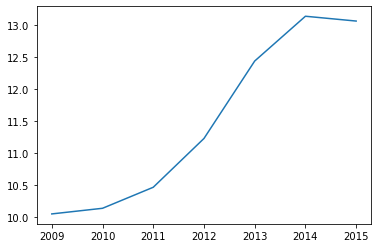

In [30]:
plt.plot(tf.groupby('year')['amount'].mean()) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'June'),
  Text(1, 0, 'January'),
  Text(2, 0, 'August'),
  Text(3, 0, 'April'),
  Text(4, 0, 'March'),
  Text(5, 0, 'November'),
  Text(6, 0, 'December'),
  Text(7, 0, 'September'),
  Text(8, 0, 'July'),
  Text(9, 0, 'February'),
  Text(10, 0, 'May'),
  Text(11, 0, 'October')])

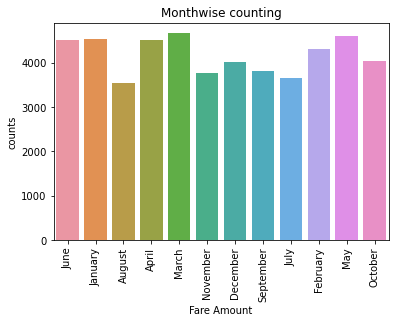

In [31]:
sns.countplot(x='month', data=tf)
plt.xlabel("Fare Amount")
plt.ylabel('counts')
plt.title("Monthwise counting")
plt.xticks(rotation=90)

In [32]:
tf.groupby('month')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
April,4519.0,11.321361,9.487037,-2.5,6.0,8.5,12.5,93.75
August,3543.0,11.316616,10.315227,-3.0,6.0,8.5,12.5,165.00
December,4015.0,11.670543,10.212445,2.5,6.0,8.5,13.0,135.00
February,4302.0,10.933728,9.510653,0.0,6.0,8.1,12.1,200.00
January,4546.0,10.700930,9.235979,2.5,5.7,8.0,11.7,180.00
July,3656.0,10.937166,8.947714,2.5,6.0,8.1,12.1,120.00
June,4516.0,11.457146,9.267060,2.5,6.1,8.5,13.0,96.25
March,4671.0,11.085596,9.172258,-5.0,5.8,8.1,12.5,80.50
May,4612.0,11.868103,10.307439,0.0,6.1,8.9,13.3,160.00


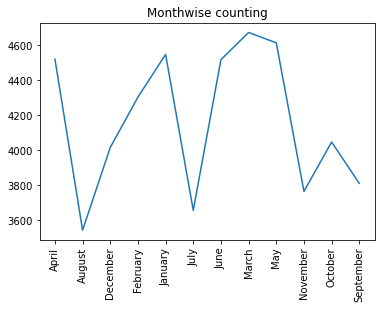

In [33]:
plt.plot(tf.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()

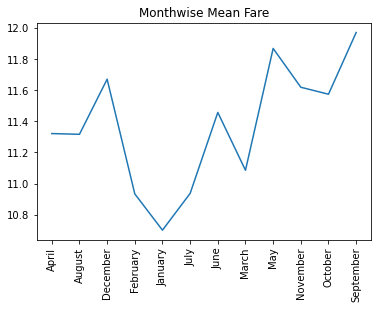

In [34]:
plt.plot(tf.groupby('month')['amount'].mean())
plt.xticks(rotation=90)
plt.title("Monthwise Mean Fare")
plt.show()

In [35]:
tf.month.replace(['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],[1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)

Text(0.5, 1.0, 'Weekday wise counting')

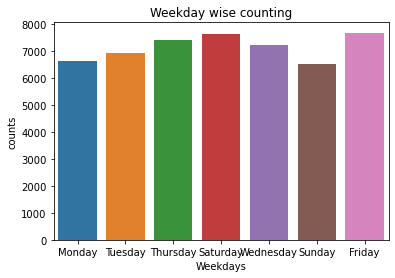

In [36]:
sns.countplot(x='day', data=tf)
plt.xlabel("Weekdays")
plt.ylabel('counts')
plt.title("Weekday wise counting")

In [37]:
tf.groupby('day')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Friday,7668.0,11.402240,9.508604,-3.0,6.1,8.5,13.0,165.00
Monday,6639.0,11.569060,10.536296,-5.0,6.0,8.1,12.5,160.00
Saturday,7630.0,11.142731,9.201668,2.5,6.0,8.5,12.5,165.00
Sunday,6518.0,11.520578,9.954766,-2.5,6.0,8.5,13.0,200.00
Thursday,7406.0,11.668594,9.983516,-2.5,6.0,8.5,13.0,149.00
Tuesday,6927.0,11.166999,9.282690,-2.9,6.0,8.5,12.5,92.49
Wednesday,7212.0,11.104773,9.357399,2.5,6.0,8.5,12.5,180.00


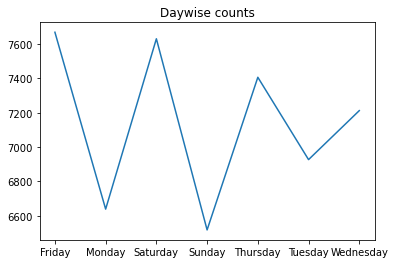

In [38]:
plt.plot(tf.groupby('day')['amount'].count())
plt.title("Daywise counts")
plt.show()

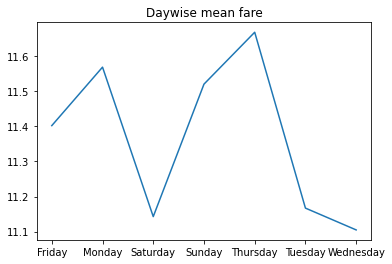

In [39]:
plt.plot(tf.groupby('day')['amount'].mean())
plt.title("Daywise mean fare")
plt.show()

In [40]:
day = {'Sunday':1,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 
       'Friday':6, 'Saturday':7 }

In [41]:
tf.day = [day[item] for item in tf.day]

In [42]:
tf.day.head()

0    2
1    3
2    5
3    7
4    3
Name: day, dtype: int64

Text(0.5, 1.0, 'Hourly counting')

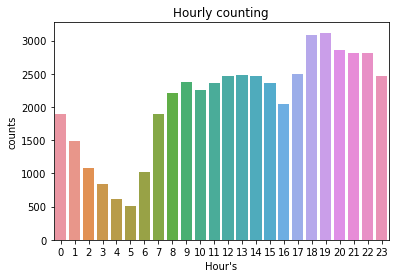

In [43]:
sns.countplot(x='hour', data=tf)
plt.xlabel("Hour's")
plt.ylabel('counts')
plt.title("Hourly counting")

In [44]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')

<AxesSubplot:>

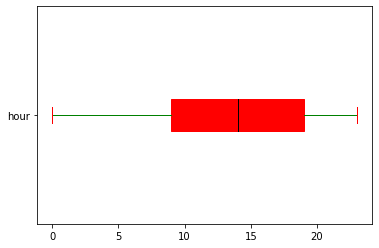

In [45]:
tf.hour.plot.box(color=props2, patch_artist = True, vert = False)

In [46]:
tf.groupby('hour')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,1890.0,11.922873,8.592224,2.5,6.50,9.30,14.50,88.25
1,1484.0,11.726065,9.043038,2.5,6.50,9.00,14.10,128.83
2,1088.0,11.246765,8.628222,2.5,6.10,8.90,13.70,136.00
3,847.0,12.087237,12.358673,2.5,6.00,8.90,14.50,200.00
4,610.0,13.740623,10.944349,2.5,6.50,10.00,17.70,80.35
5,508.0,15.338209,14.856332,-2.5,5.95,9.15,18.60,82.50
6,1017.0,12.280570,12.168081,2.5,5.30,7.70,12.50,78.50
7,1899.0,11.121827,10.251250,2.5,5.70,8.00,11.70,87.00
8,2209.0,10.611852,8.604485,-3.0,6.00,8.10,11.70,95.00


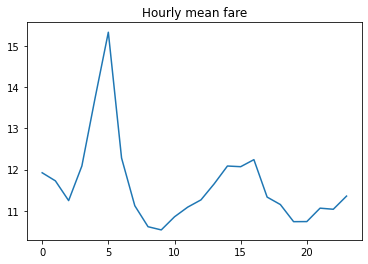

In [47]:
plt.plot(tf.groupby('hour')['amount'].mean())
plt.title("Hourly mean fare")
plt.show()

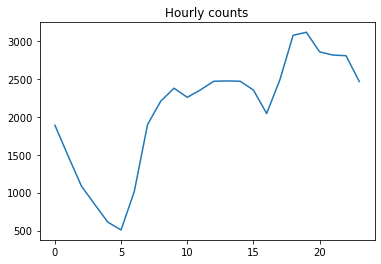

In [48]:
plt.plot(tf.groupby('hour')['amount'].count())
plt.title("Hourly counts")
plt.show()

# Making Model Decision Tree

In [55]:
x = tf.iloc[:,3:12]

In [56]:
y = tf.iloc[:,1]

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)
print(len(x_train)) #35000
print(len(x_test)) #15000)
print(len(y_train)) #35000
print(len(y_test)) #15000

35000
15000
35000
15000


In [58]:
x

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,2,17
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,3,16
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,5,0
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,7,4
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,3,7
...,...,...,...,...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,4,23
49996,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,2,17
49997,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,1,4
49998,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,3,7


In [59]:
y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 50000, dtype: float64

In [60]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

In [61]:
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [62]:
y_pred = clf.predict(x_test)

In [63]:
clf.get_depth()

57

In [64]:
depth = list(range(1,12))

mse_train, mse_test = [],[]

for i in depth:
    prdctr = DecisionTreeRegressor(max_depth= i, random_state=25)       
    prdctr.fit(x_train, y_train)
    y_train_pred=prdctr.predict(x_train)
    y_test_pred=prdctr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

In [65]:
mse_test

[74.04828850631911,
 49.18157014903811,
 41.700612103984206,
 37.827064605370445,
 35.331244334402705,
 33.17848663545858,
 32.157150433769516,
 31.869869557609317,
 33.453811521741194,
 32.076562451121774,
 33.67607106258933]

In [66]:
mse_train

[81.20120767432734,
 57.36392977003622,
 47.97546697818935,
 41.29543370824363,
 36.68739175919116,
 32.310313520544774,
 29.28208436646542,
 26.859661231792085,
 24.453267258716853,
 22.226467856066062,
 20.1335492761282]

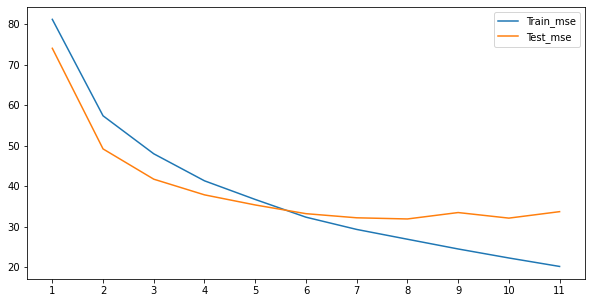

In [67]:
plt.figure(figsize = (10,5))
sns.lineplot(y=mse_train, x = depth, label = 'Train_mse')
sns.lineplot(y=mse_test, x = depth, label = 'Test_mse')
plt.xticks(ticks=np.arange(1,12,1))
plt.show()

In [68]:
# We can say the maximum depth is around 6

In [69]:
clf = DecisionTreeRegressor(max_depth= 6, random_state=25)

In [70]:
tf_clf = clf.fit(x_train, y_train)

In [71]:
y_pred = tf_clf.predict(x_test)

In [72]:
y_ptr = tf_clf.predict(x_train)

In [73]:
mean_squared_error(y_pred,y_test)

33.17848663545858

In [74]:
mean_squared_error(y_ptr,y_train)

32.310313520544774

In [75]:
clf.score(x_test,y_test)

0.6259303859964777

In [76]:
clf.get_depth()

6

In [77]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)

In [78]:
RMSE

5.760076964369364

In [79]:
y_pred

array([ 8.87227439, 14.5500852 ,  8.87227439, ...,  8.87227439,
        8.87227439,  8.87227439])

In [80]:
obs_No = list(range(1, 15001))

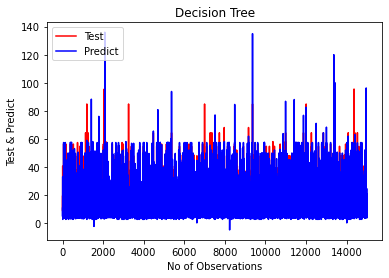

In [81]:
plt.plot(obs_No, y_pred, 'r')
plt.plot(obs_No, y_test, 'b')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Decision Tree')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()

# Making Model with Random Forest

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
params = {'max_depth': [3,4,5,6,7,8]}

rgr1 = RandomForestRegressor(random_state=123, n_estimators = 200)

In [88]:
rgr2 = RandomizedSearchCV(rgr1, params, n_iter=10)

In [89]:
rgr2.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=200,
                                                   random_state=123),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8]})

In [90]:
from pprint import pprint

In [91]:
pprint(rgr2.fit(x_train,y_train).best_estimator_.get_params())

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


In [92]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 200, max_depth=8, random_state=123) 
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=123)

In [93]:
y_pred = rfr.predict(x_test)

In [94]:
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print(RMSE)

5.21757575294194


In [95]:
rfr.score(x_test,y_test)

0.6930742079789676